#Introduction to Data Science

See [Lesson 1](https://www.udacity.com/course/intro-to-data-analysis--ud170)

You should run it in local Jupyter env as this notebook refers to local dataset

In [2]:
import unicodecsv
from datetime import datetime as dt

enrollments_filename = 'dataset/enrollments.csv'
engagement_filename = 'dataset/daily_engagement.csv'
submissions_filename = 'dataset/project_submissions.csv'

## Longer version of code (replaced with shorter, equivalent version below)

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

enrollments = read_csv(enrollments_filename)
daily_engagement = read_csv(engagement_filename)
project_submissions = read_csv(submissions_filename)


def renameKey(data, fromKey, toKey):
    for rec in data:
        if fromKey in rec:
            rec[toKey] = rec[fromKey]
            del rec[fromKey]
renameKey(daily_engagement, 'acct', 'account_key')

def cleanDataTypes():
    def fixIntFloat(data, field):
        if field not in data:
            print(f'WARNING : Field {field} is not in {data}')
        value = data[field]

        if value == '':
            data[field] = None
        else:
            data[field] = int(float(value))

    def fixFloat(data, field):
        if field not in data:
            print(f'WARNING : Field {field} is not in {data}')
        value = data[field]

        if value == '':
            data[field] = None
        else:
            data[field] = float(value)

    def fixDate(data, field):
        if field not in data:
            print(f'WARNING : Field {field} is not in {data}')
        value = data[field]

        if value == '':
            data[field] = None
        else:
            data[field] = dt.strptime(value, '%Y-%m-%d')

    def fixBool(data, field):
        if field not in data:
            print(f'WARNING : Field {field} is not in {data}')
        value = data[field]

        if value == 'True':
            data[field] = True
        elif value == 'False':
            data[field] = False
        else:
            print(f"WARNING: invalid boolean '{value}' value converted to False in {data}")
            data[field] = False

    def fixInt(data, field):
        if field not in data:
            print(f'WARNING : Field {field} is not in {data}')
        value = data[field]
        if value == '':
            data[field] = None
        else:
            data[field] = int(value)

    #clean data types
    for rec in enrollments:
        fixInt(rec, 'days_to_cancel')
        fixDate(rec, 'join_date')
        fixDate(rec, 'cancel_date')
        fixBool(rec, 'is_udacity')
        fixBool(rec, 'is_canceled')

    for rec in daily_engagement:
        fixDate(rec, 'utc_date')
        fixIntFloat(rec, 'num_courses_visited')
        fixFloat(rec, 'total_minutes_visited')
        fixIntFloat(rec, 'lessons_completed')
        fixIntFloat(rec, 'projects_completed')

    for rec in project_submissions:
        fixDate(rec, 'creation_date')
        fixDate(rec, 'completion_date')

cleanDataTypes()

print(f"enrollments[0] = {enrollments[0]}\n")
print(f"daily_engagement[0] = {daily_engagement[0]}\n")
print(f"project_submissions[0] = {project_submissions[0]}\n")

enrollments[0] = {'account_key': '448', 'status': 'canceled', 'join_date': datetime.datetime(2014, 11, 10, 0, 0), 'cancel_date': datetime.datetime(2015, 1, 14, 0, 0), 'days_to_cancel': 65, 'is_udacity': True, 'is_canceled': True}

daily_engagement[0] = {'utc_date': datetime.datetime(2015, 1, 9, 0, 0), 'num_courses_visited': 1, 'total_minutes_visited': 11.6793745, 'lessons_completed': 0, 'projects_completed': 0, 'account_key': '0'}

project_submissions[0] = {'creation_date': datetime.datetime(2015, 1, 14, 0, 0), 'completion_date': datetime.datetime(2015, 1, 16, 0, 0), 'assigned_rating': 'UNGRADED', 'account_key': '256', 'lesson_key': '3176718735', 'processing_state': 'EVALUATED'}



In [3]:
from collections import defaultdict

def getUniqueAccounts(data):
    accts = defaultdict(list)
    i = 0
    for record in data:
        accountKey = record['account_key']
        accts[accountKey].append(i)
        i+=1
    
    return accts

enrollment_num_rows = len(enrollments)
enrollment_unique_students = getUniqueAccounts(enrollments)
enrollment_num_unique_students = len(enrollment_unique_students)

engagement_num_rows = len(daily_engagement)
engagement_unique_students = getUniqueAccounts(daily_engagement)
engagement_num_unique_students = len(engagement_unique_students)

submission_num_rows = len(project_submissions)
submission_unique_students = getUniqueAccounts(project_submissions)
submission_num_unique_students = len(submission_unique_students)

print(f"enrollments total={enrollment_num_rows}, unique={enrollment_num_unique_students}")

print(f"engagements total={engagement_num_rows}, unique={engagement_num_unique_students}")

print(f"submissions total={submission_num_rows} unique={submission_num_unique_students}")


enrollments total=1640, unique=1302
engagements total=136240, unique=1237
submissions total=3642 unique=743


In [4]:
for enrollment_acct in enrollment_unique_students:
    if enrollment_acct not in engagement_unique_students:
        #print(enrollment_unique_students[enrollment])
        enrollment_id = enrollment_unique_students[enrollment_acct][0]
        enrollment = enrollments[enrollment_id]
        print(f"Strange student : enrollment={enrollment}")
        break


Strange student : enrollment={'account_key': '1219', 'status': 'canceled', 'join_date': datetime.datetime(2014, 11, 12, 0, 0), 'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), 'days_to_cancel': 0, 'is_udacity': False, 'is_canceled': True}


In [5]:
strange_enrollments_num_by_different_date = 0

for enrollment_acct in enrollment_unique_students:
    if enrollment_acct not in engagement_unique_students:
        for enrollment_id in enrollment_unique_students[enrollment_acct]:
            enrollment = enrollments[enrollment_id]
            if enrollment['join_date'] != enrollment['cancel_date']:
                strange_enrollments_num_by_different_date += 1
                #print(f"Strange student with different dates : enrollments[{enrollment_id}]={enrollment}\n")

print(f"Number of enrolled and cancelled at different dates but not engaged (problemactic accounts) : {strange_enrollments_num_by_different_date}\n")

Number of enrolled and cancelled at different dates but not engaged (problemactic accounts) : 3



In [6]:
num_problems = 0
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in engagement_unique_students and enrollment['join_date'] != enrollment['cancel_date']:
        num_problems += 1
        #print(enrollment)

print(f'Number of problematic account records : {num_problems}')

Number of problematic account records : 3


In [7]:
def getRealAccounts(enrollmentData):
    result = []
    for rec in enrollmentData:
        if not rec['is_udacity']:
            result.append(rec)
    return result

real_enrollments = getRealAccounts(enrollments)
print(f'Real account : {len(real_enrollments)}')

Real account : 1622


In [8]:
def getPaidStudents(enrollmentData):
    freePeriodDays = 7
    result = {}
    #result1 = {}
    for rec in enrollmentData:
        if rec['cancel_date'] == None or rec['days_to_cancel'] > freePeriodDays:
            accountKey = rec['account_key']
            joinDate = rec['join_date']
            if accountKey not in result or joinDate > result[accountKey]:
                result[accountKey] = joinDate
            #result1[accountKey] = joinDate
    '''
    for accountKey, joinDate in result.items():
        joinDate1 = result1[accountKey]
        if joinDate != joinDate1:
            print(f"{accountKey} : {joinDate} != {joinDate1}")
    '''
    return result

paid_students = getPaidStudents(real_enrollments)

print(f'Paid students : {len(paid_students)}')

Paid students : 995


In [9]:
def isEngagementWithingOneWeek(joinDate, engagementDate):
    #if joinDate > engagementDate:
    #    print(f'WARNING: join date is after engagement date')
    timeDelta = engagementDate - joinDate
    return 0 <= timeDelta.days and timeDelta.days < 7


def collectPaidEnagagementsInTheFirstWeek():
    result = []
    i = 0
    for engagement in daily_engagement:
        accountKey = engagement['account_key']
        if accountKey in paid_students:
            joinDate = paid_students[accountKey]
            engagementDate = engagement['utc_date']
            if isEngagementWithingOneWeek(joinDate, engagementDate):
                result.append(i)
        i+=1
    return result

paid_engagement_in_first_week = collectPaidEnagagementsInTheFirstWeek()

print(f'Number of paid engagements in the first week : {len(paid_engagement_in_first_week)}')

Number of paid engagements in the first week : 6919


In [10]:
from collections import defaultdict
import numpy as np

def groupEngagementsByAccounts(engagements):
    result = defaultdict(list)
    for engagementId in engagements:
        engagement = daily_engagement[engagementId]
        accountKey = engagement['account_key']
        result[accountKey].append(engagementId)
    return result

first_week_paid_engagements_by_account = groupEngagementsByAccounts(paid_engagement_in_first_week)

def sumEngagementsStatByAccount(engagements, getStatValue):
    result = {}
    for accountKey, engagementIds in engagements.items():
        stat_sum = 0
        for engagementId in engagementIds:
            engagement = daily_engagement[engagementId]
            stat_sum += getStatValue(engagement)
        result[accountKey] = stat_sum
    return result

def printStats(getStatValue, statLabel):
    first_week_paid_engagements_sum_stat_by_account = sumEngagementsStatByAccount(first_week_paid_engagements_by_account, getStatValue)
    first_week_paid_engagements_sum_stat = list(first_week_paid_engagements_sum_stat_by_account.values())

    print(f'Average {statLabel} spent by paid accounts during the first week : {np.mean(first_week_paid_engagements_sum_stat)}')
    print(f'StdDev {statLabel} spent by paid accounts during the first week : {np.std(first_week_paid_engagements_sum_stat)}')
    print(f'Min {statLabel} spent by paid accounts during the first week : {np.min(first_week_paid_engagements_sum_stat)}')
    print(f'Max {statLabel} spent by paid accounts during the first week : {np.max(first_week_paid_engagements_sum_stat)}')

    print('\n')

printStats((lambda data : data['total_minutes_visited']), 'minutes')
printStats((lambda data : data['lessons_completed']), 'lessons')
printStats((lambda data : 1 if data['num_courses_visited'] > 0 else 0), 'days')


Average minutes spent by paid accounts during the first week : 306.70832675342825
StdDev minutes spent by paid accounts during the first week : 412.99693340852957
Min minutes spent by paid accounts during the first week : 0.0
Max minutes spent by paid accounts during the first week : 3564.7332644989997


Average lessons spent by paid accounts during the first week : 1.636180904522613
StdDev lessons spent by paid accounts during the first week : 3.002561299829423
Min lessons spent by paid accounts during the first week : 0
Max lessons spent by paid accounts during the first week : 36


Average days spent by paid accounts during the first week : 2.8673366834170855
StdDev days spent by paid accounts during the first week : 2.2551980029196814
Min days spent by paid accounts during the first week : 0
Max days spent by paid accounts during the first week : 7




In [11]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = {'746169184', '3176718735'}
passing_grades = {'DISTINCTION', 'PASSED'} #{'', 'INCOMPLETE', 'DISTINCTION', 'PASSED', 'UNGRADED'}
#passing_grades = {'PASSED'} #{'', 'INCOMPLETE', 'DISTINCTION', 'PASSED', 'UNGRADED'}


passing_engagement = []
non_passing_engagement = []

for accountKey, engagementIds in first_week_paid_engagements_by_account.items():
    if accountKey in submission_unique_students:
        submissionIds = submission_unique_students[accountKey]
        isPassed = False
        for submissionId in submissionIds:
            submission = project_submissions[submissionId]
            if submission['assigned_rating'] in passing_grades and submission['lesson_key'] in subway_project_lesson_keys:
                isPassed = True
                break
        if isPassed:
            passing_engagement += engagementIds
        else:
            non_passing_engagement += engagementIds
    else:
        non_passing_engagement += engagementIds

print(f'First week engagements with passing grade : {len(passing_engagement)}')
print(f'First week engagements with non-passing grade : {len(non_passing_engagement)}')


First week engagements with passing grade : 4527
First week engagements with non-passing grade : 2392


In [12]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

passing_engagement_by_account = groupEngagementsByAccounts(passing_engagement)
non_passing_engagement_by_account = groupEngagementsByAccounts(non_passing_engagement)

def getArgStatEngagements(engagementIds, getStatValue):
    stat_sum = 0
    stat_num = 0
    for engagementId in engagementIds:
        engagement = daily_engagement[engagementId]
        stat_sum += getStatValue(engagement)
        stat_num += 1
    if stat_num > 0:
        return stat_sum / stat_num
    else:
        return 0

#sumEngagementsStatByAccount(first_week_paid_engagements_by_account, getStatValue)
passed_minutes     = list(sumEngagementsStatByAccount(passing_engagement_by_account, (lambda data : data['total_minutes_visited'])).values())
non_passed_minutes = list(sumEngagementsStatByAccount(non_passing_engagement_by_account, (lambda data : data['total_minutes_visited'])).values())
passed_lessons     = list(sumEngagementsStatByAccount(passing_engagement_by_account, (lambda data : data['lessons_completed'])).values())
non_passed_lessons = list(sumEngagementsStatByAccount(non_passing_engagement_by_account, (lambda data : data['lessons_completed'])).values())
passed_days        = list(sumEngagementsStatByAccount(passing_engagement_by_account, (lambda data : 1 if data['num_courses_visited'] > 0 else 0)).values())
non_passed_days    = list(sumEngagementsStatByAccount(non_passing_engagement_by_account, (lambda data : 1 if data['num_courses_visited'] > 0 else 0)).values())


print(f'Passed Avg Minutes     = {np.mean(passed_minutes)}')
print(f'Non passed Avg Minutes = {np.mean(non_passed_minutes)}')
print(f'Passed Avg Lessons     = {np.mean(passed_lessons)}')
print(f'Non passed Avg Lessons = {np.mean(non_passed_lessons)}')
print(f'Passed Avg Days        = {np.mean(passed_days)}')
print(f'Non passed Avg Days    = {np.mean(non_passed_days)}')


Passed Avg Minutes     = 394.58604648350865
Non passed Avg Minutes = 143.32647426675584
Passed Avg Lessons     = 2.052550231839258
Non passed Avg Lessons = 0.8620689655172413
Passed Avg Days        = 3.384853168469861
Non passed Avg Days    = 1.9051724137931034


Text(0.5, 1.0, 'Passed (green) VS Non-passed (light-blue) students')

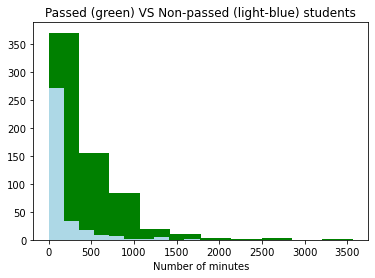

In [13]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(passed_minutes, color ='green')
plt.hist(non_passed_minutes, color ='lightblue')
plt.xlabel('Number of minutes')
plt.title('Passed (green) VS Non-passed (light-blue) students')
#sns.displot(passed_minutes, color ='green')
#sns.displot(non_passed_minutes, color ='lightblue')

Text(0.5, 1.0, 'Passed (green) VS Non-passed (light-blue) students')

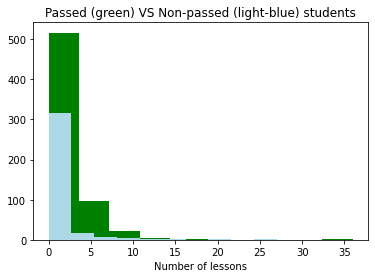

In [14]:
plt.hist(passed_lessons, color ='green')
plt.hist(non_passed_lessons, color ='lightblue')
plt.xlabel('Number of lessons')
plt.title('Passed (green) VS Non-passed (light-blue) students')

Text(0.5, 1.0, 'Passed students')

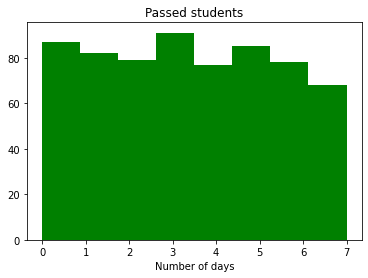

In [15]:
plt.hist(passed_days, color ='green', bins = 8)
plt.xlabel('Number of days')
plt.title('Passed students')

Text(0.5, 1.0, 'Non-passed students')

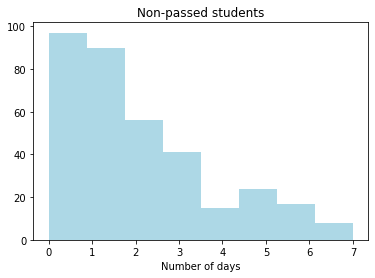

In [16]:
plt.hist(non_passed_days, color ='lightblue', bins = 8)
plt.xlabel('Number of days')
plt.title('Non-passed students')